In [1]:
import bw2data, bw2calc, bw2io
from edges import EdgeLCIA, get_available_methods
from bw2analyzer.contribution import ContributionAnalysis

In [2]:
bw2data.projects.set_current("ecoinvent-3.10-cutoff")
act = bw2data.Database("ecoinvent-3.10.1-cutoff").search("electricity production, medium voltage")[-1]
#act = bw2data.Database("ecoinvent-3.10.1-cutoff").random()
act

'market for electricity, medium voltage' (kilowatt hour, SS, None)

In [3]:
method = ('GeoPolRisk', 'paired', '2024')
LCA = EdgeLCIA({act: 1}, method)
LCA.lci()
LCA.map_exchanges()
LCA.map_aggregate_locations()
LCA.map_dynamic_locations()
LCA.map_remaining_locations_to_global()
LCA.evaluate_cfs()
LCA.lcia()

Mapping 155115 exchanges...


Mapping exchanges: 100%|██████████| 51932/51932 [00:13<00:00, 3905.79it/s]


Processed edges: 161
Handling static regions...


Processing static groups (pass 1): 0it [00:00, ?it/s]


The length of Entered edge list is: %s 0


Processing static groups (pass 2): 0it [00:00, ?it/s]
Processing static groups (pass 1): 100%|██████████| 6/6 [00:00<00:00, 1201.00it/s]


The length of Entered edge list is: %s 38433


Processing static groups (pass 2): 100%|██████████| 9143/9143 [00:01<00:00, 8067.01it/s] 


Processed edges: 167
Handling dynamic regions...
Processing 154948 unprocessed edges in technosphere-technosphere direction...
Counter: 67910, InCounter: 67910
Remaining edges after prefiltering: 67910


Processing dynamic groups (pass 1): 0it [00:00, ?it/s]

The length of Entered edge list is: %s 67910



Processing dynamic groups (pass 2): 100%|██████████| 5090/5090 [00:00<00:00, 462810.97it/s]


Processed edges: 167
Handling remaining exchanges...


Processing global groups (pass 1): 0it [00:00, ?it/s]


The length of Entered edge list is: %s 0


Processing global groups (pass 2): 0it [00:00, ?it/s]
Processing global groups (pass 1): 100%|██████████| 3/3 [00:00<00:00, 63.13it/s]


The length of Entered edge list is: %s 154945


Processing global groups (pass 2): 100%|██████████| 36339/36339 [00:02<00:00, 12627.03it/s]


Processed edges: 168


In [4]:
df = LCA.generate_cf_table()

In [5]:
len(df)

168

In [6]:
df

,supplier name,supplier reference product,supplier location,consumer name,consumer reference product,consumer location,amount,CF,impact
0,antimony production,antimony,CN,market for antimony,antimony,GLO,3.250992e-11,0.030356,9.868680e-13
1,"asbestos production, chrysotile type","asbestos, chrysotile type",GLO,"market for asbestos, chrysotile type","asbestos, chrysotile type",GLO,5.792499e-07,0.243972,1.413206e-07
2,boron carbide production,boron carbide,GLO,market for boron carbide,boron carbide,GLO,6.182609e-09,493.818821,3.053089e-06
3,"cadmium production, primary",cadmium,CA-QC,market for cadmium,cadmium,GLO,1.295041e-14,0.001158,1.500130e-17
4,"hard coal power plant construction, 500MW",hard coal power plant,GLO,market for hard coal power plant,hard coal power plant,GLO,1.495161e-13,0.101544,1.518239e-14
...,...,...,...,...,...,...,...,...,...
163,tin production,tin,PE,market for tin,tin,GLO,9.934553e-10,0.020199,2.006686e-11
164,gold production,gold,AU,market for gold,gold,GLO,1.566990e-11,0.445675,6.983684e-12
165,gold production,gold,TZ,market for gold,gold,GLO,2.437750e-12,0.452623,1.103381e-12
166,"platinum group metal mine operation, ore with ...",platinum,RU,market for platinum,platinum,GLO,1.365779e-10,471.907007,6.445207e-08


In [7]:
df.groupby(["supplier location", "consumer location"])["impact"].mean()

supplier location  consumer location
AE                 IN                   1.743823e-08
                   ZA                   6.742618e-10
AR                 IN                   6.880257e-12
AU                 GLO                  6.919463e-08
AZ                 IN                   1.115763e-10
                                            ...     
VE                 IN                   3.813283e-09
ZA                 GLO                  5.122763e-07
                   IN                   2.300749e-09
                   ZA                   2.301499e-11
ZM                 GLO                  5.331777e-08
Name: impact, Length: 89, dtype: float64

In [8]:
LCA.statistics()

+----------------------+----------------------------------------+
|       Activity       | market for electricity, medium voltage |
|     Method name      |    ('GeoPolRisk', 'paired', '2024')    |
|         Unit         |             kg copper-eq.              |
|      Data file       |         GeoPolRisk_paired_2024         |
|    CFs in method     |                 51932                  |
|       CFs used       |                  108                   |
|   Unique CFs used    |                  108                   |
|  Exc. characterized  |                  168                   |
| Exc. uncharacterized |                 154947                 |
+----------------------+----------------------------------------+


In [9]:
LCA.score

4.0834225236068385e-05

In [10]:
df = LCA.generate_cf_table()

In [11]:
df

,supplier name,supplier reference product,supplier location,consumer name,consumer reference product,consumer location,amount,CF,impact
0,antimony production,antimony,CN,market for antimony,antimony,GLO,3.250992e-11,0.030356,9.868680e-13
1,"asbestos production, chrysotile type","asbestos, chrysotile type",GLO,"market for asbestos, chrysotile type","asbestos, chrysotile type",GLO,5.792499e-07,0.243972,1.413206e-07
2,boron carbide production,boron carbide,GLO,market for boron carbide,boron carbide,GLO,6.182609e-09,493.818821,3.053089e-06
3,"cadmium production, primary",cadmium,CA-QC,market for cadmium,cadmium,GLO,1.295041e-14,0.001158,1.500130e-17
4,"hard coal power plant construction, 500MW",hard coal power plant,GLO,market for hard coal power plant,hard coal power plant,GLO,1.495161e-13,0.101544,1.518239e-14
...,...,...,...,...,...,...,...,...,...
163,tin production,tin,PE,market for tin,tin,GLO,9.934553e-10,0.020199,2.006686e-11
164,gold production,gold,AU,market for gold,gold,GLO,1.566990e-11,0.445675,6.983684e-12
165,gold production,gold,TZ,market for gold,gold,GLO,2.437750e-12,0.452623,1.103381e-12
166,"platinum group metal mine operation, ore with ...",platinum,RU,market for platinum,platinum,GLO,1.365779e-10,471.907007,6.445207e-08


In [12]:
LCA.statistics()

+----------------------+----------------------------------------+
|       Activity       | market for electricity, medium voltage |
|     Method name      |    ('GeoPolRisk', 'paired', '2024')    |
|         Unit         |             kg copper-eq.              |
|      Data file       |         GeoPolRisk_paired_2024         |
|    CFs in method     |                 51932                  |
|       CFs used       |                  108                   |
|   Unique CFs used    |                  108                   |
|  Exc. characterized  |                  168                   |
| Exc. uncharacterized |                 154947                 |
+----------------------+----------------------------------------+


'heat and power co-generation, wood chips, 6667 kW, state-of-the-art 2014' (megajoule, BG, None)
Mapping 155126 exchanges...


Mapping exchanges: 100%|██████████| 51932/51932 [00:00<00:00, 71062.62it/s]


Processed edges: 161
Handling static regions...


Processing static groups (pass 1): 0it [00:00, ?it/s]


The length of Entered edge list is: %s 0


Processing static groups (pass 2): 0it [00:00, ?it/s]
Processing static groups (pass 1): 100%|██████████| 6/6 [00:00<00:00, 1200.32it/s]


The length of Entered edge list is: %s 38433


Processing static groups (pass 2): 100%|██████████| 9143/9143 [00:01<00:00, 8490.42it/s] 


Processed edges: 167
Handling dynamic regions...
Processing 154959 unprocessed edges in technosphere-technosphere direction...
Counter: 67910, InCounter: 67910
Remaining edges after prefiltering: 67910


Processing dynamic groups (pass 1): 0it [00:00, ?it/s]

The length of Entered edge list is: %s 67910



Processing dynamic groups (pass 2): 100%|██████████| 5090/5090 [00:00<00:00, 338529.23it/s]


Processed edges: 167
Handling remaining exchanges...


Processing global groups (pass 1): 0it [00:00, ?it/s]


The length of Entered edge list is: %s 0


Processing global groups (pass 2): 0it [00:00, ?it/s]
Processing global groups (pass 1): 100%|██████████| 3/3 [00:00<00:00, 325.64it/s]


The length of Entered edge list is: %s 154956


Processing global groups (pass 2): 100%|██████████| 36339/36339 [00:03<00:00, 9887.14it/s] 


Processed edges: 168


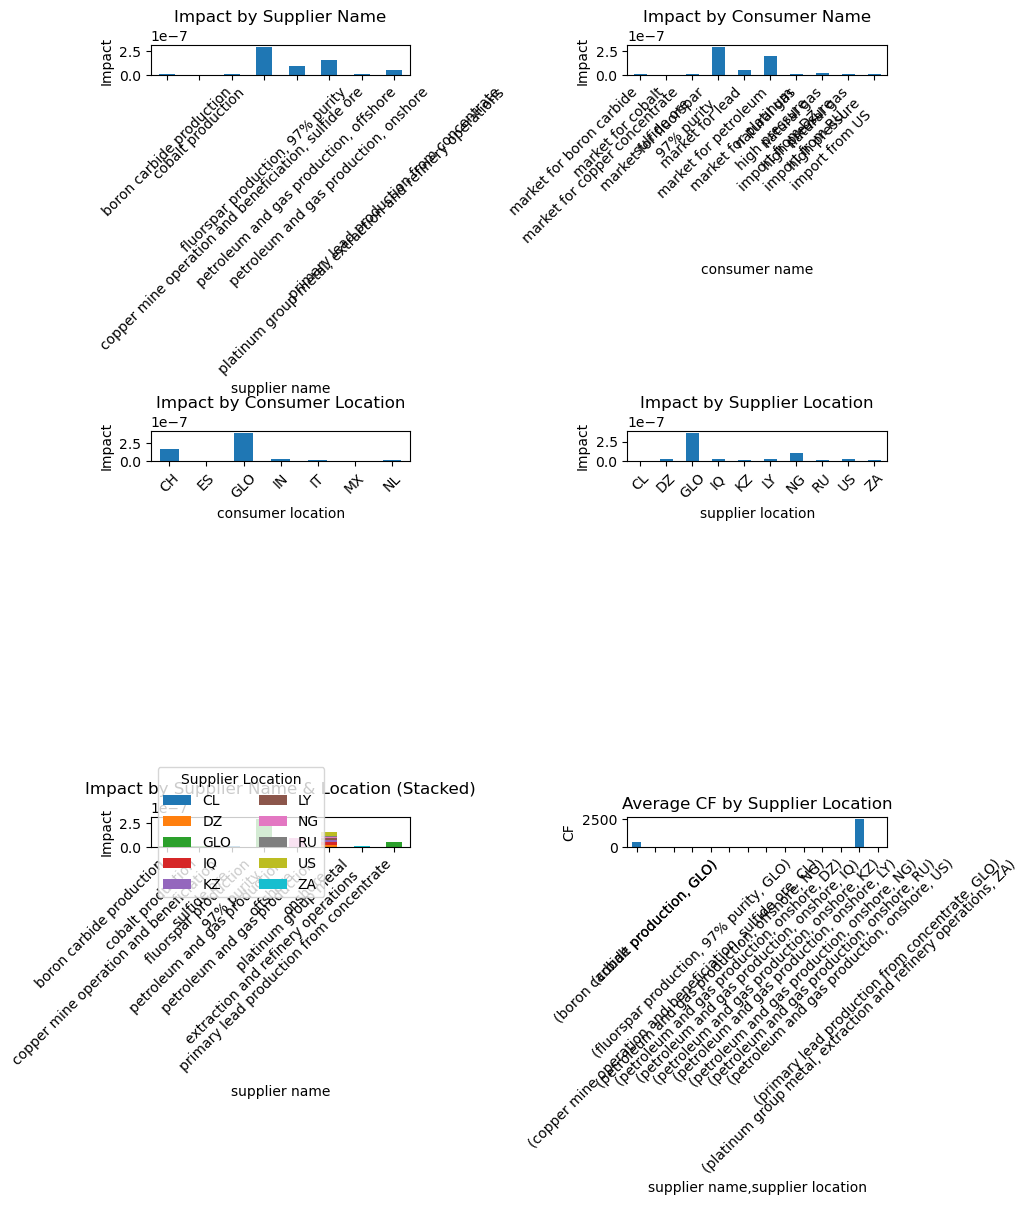

In [13]:
import matplotlib.pyplot as plt
methods = [('GeoPolRisk', 'paired', '2024'),]
bw2data.projects.set_current("ecoinvent-3.10-cutoff")
act = bw2data.Database("ecoinvent-3.10.1-cutoff").random()
print(act)
for method in methods:
    LCA = EdgeLCIA({act: 1}, method)
    LCA.lci()
    LCA.map_exchanges()
    LCA.map_aggregate_locations()
    LCA.map_dynamic_locations()
    LCA.map_remaining_locations_to_global()
    LCA.evaluate_cfs()
    LCA.lcia()
    df = LCA.generate_cf_table()

    cutoff = 0.01

    # remove rows for which "amount" is below the cutoff
    total = df["impact"].sum()
    df = df[df["impact"] > cutoff * total]

    # Plotting
    fig, axes = plt.subplots(3, 2, figsize=(10, 12))

    # 1. Bar plot of "amount" by "supplier name"
    df.groupby("supplier name")["impact"].sum().plot(kind="bar", ax=axes[0, 0])
    axes[0, 0].set_title("Impact by Supplier Name")
    axes[0, 0].set_ylabel("Impact")
    axes[0, 0].tick_params(axis="x", rotation=45)

    # 2. Bar plot of "amount" by "consumer name"
    df.groupby("consumer name")["impact"].sum().plot(kind="bar", ax=axes[0, 1])
    axes[0, 1].set_title("Impact by Consumer Name")
    axes[0, 1].set_ylabel("Impact")
    axes[0, 1].set_xticklabels(
        [label.get_text().replace(", ", "\n") for label in axes[0, 1].get_xticklabels()],
        rotation=45,
        ha="right",
    )

    # 3. Bar plot of "impact" by "consumer location"
    df.groupby("consumer location")["impact"].sum().plot(kind="bar", ax=axes[1, 0])
    axes[1, 0].set_title("Impact by Consumer Location")
    axes[1, 0].set_ylabel("Impact")
    axes[1, 0].tick_params(axis="x", rotation=45)


    # 3. Bar plot of "impact" by "supplier location"
    df.groupby("supplier location")["impact"].sum().plot(kind="bar", ax=axes[1, 1])
    axes[1, 1].set_title("Impact by Supplier Location")
    axes[1, 1].set_ylabel("Impact")
    axes[1, 1].tick_params(axis="x", rotation=45)


    # 4. Stacked bar plot for "amount" by "consumer name" and "consumer location"
    df_grouped = df.groupby(["supplier name", "supplier location"])["impact"].sum().unstack()
    df_grouped.plot(kind="bar", stacked=True, ax=axes[2, 0])
    axes[2, 0].set_title("Impact by Supplier Name & Location (Stacked)")
    axes[2, 0].set_ylabel("Impact")
    axes[2, 0].set_xticklabels(
        [label.get_text().replace(", ", "\n") for label in axes[2, 0].get_xticklabels()],
        rotation=45,
        ha="right",
    )
    axes[2, 0].legend(title="Supplier Location", loc="center left", ncol=2)

    # 5. Bar plot of average "CF" by "consumer location"
    df.groupby(["supplier name", "supplier location"])["CF"].mean().plot(kind="bar", ax=axes[2, 1])
    axes[2, 1].set_title("Average CF by Supplier Location")
    axes[2, 1].set_ylabel("CF")
    axes[2, 1].tick_params(axis="x", rotation=45)


    plt.tight_layout()
    plt.show()

    

  #LCA.score

In [14]:
df.sort_values(by="impact", ascending=False).loc[:, "supplier name"]

118                     fluorspar production, 97% purity
74                petroleum and gas production, offshore
121             primary lead production from concentrate
47                 petroleum and gas production, onshore
105                petroleum and gas production, onshore
59                 petroleum and gas production, onshore
126                petroleum and gas production, onshore
157    platinum group metal, extraction and refinery ...
150                petroleum and gas production, onshore
2                               boron carbide production
50                 petroleum and gas production, onshore
154                petroleum and gas production, onshore
75                 petroleum and gas production, onshore
14     copper mine operation and beneficiation, sulfi...
10                                     cobalt production
127                petroleum and gas production, onshore
Name: supplier name, dtype: object

In [15]:
df.loc[df["consumer name"] == "soybean production"]

,supplier name,supplier reference product,supplier location,consumer name,consumer reference product,consumer location,amount,CF,impact


In [16]:
df.sort_values("amount", ascending=False)

,supplier name,supplier reference product,supplier location,consumer name,consumer reference product,consumer location,amount,CF,impact
74,"petroleum and gas production, offshore",petroleum,NG,market for petroleum,petroleum,CH,5.977903e-06,0.015400,9.205777e-08
105,"petroleum and gas production, onshore",petroleum,US,market for petroleum,petroleum,CH,4.593556e-06,0.005429,2.494047e-08
59,"petroleum and gas production, onshore",petroleum,LY,market for petroleum,petroleum,CH,3.344150e-06,0.007195,2.406153e-08
126,"petroleum and gas production, onshore","natural gas, high pressure",DZ,"natural gas, high pressure, import from DZ","natural gas, high pressure",IT,1.739085e-06,0.009749,1.695376e-08
47,"petroleum and gas production, onshore",petroleum,IQ,market for petroleum,petroleum,IN,1.579021e-06,0.021345,3.370355e-08
127,"petroleum and gas production, onshore","natural gas, high pressure",DZ,"natural gas, high pressure, import from DZ","natural gas, high pressure",ES,8.816114e-07,0.008351,7.362758e-09
118,"fluorspar production, 97% purity","fluorspar, 97% purity",GLO,"market for fluorspar, 97% purity","fluorspar, 97% purity",GLO,7.652773e-07,0.385217,2.947979e-07
75,"petroleum and gas production, onshore",petroleum,NG,market for petroleum,petroleum,CH,6.642114e-07,0.015400,1.022864e-08
154,"petroleum and gas production, onshore","natural gas, high pressure",US,"natural gas, high pressure, import from US","natural gas, high pressure",MX,5.003928e-07,0.021042,1.052943e-08
150,"petroleum and gas production, onshore","natural gas, high pressure",RU,"natural gas, high pressure, import from RU","natural gas, high pressure",NL,4.781301e-07,0.030480,1.457348e-08


In [17]:
df["CF"].unique()

array([4.93818821e+02, 1.21630530e+01, 4.68090080e-02, 2.13445826e-02,
       2.79047185e-02, 7.19510970e-03, 1.53996756e-02, 5.42944826e-03,
       3.85217162e-01, 2.64418503e-01, 9.74866548e-03, 8.35147818e-03,
       3.04801601e-02, 2.10423310e-02, 2.55081659e+03])

In [18]:
df.groupby(["supplier name", "consumer location"])["CF"].mean()

supplier name                                             consumer location
boron carbide production                                  GLO                   493.818821
cobalt production                                         GLO                    12.163053
copper mine operation and beneficiation, sulfide ore      GLO                     0.046809
fluorspar production, 97% purity                          GLO                     0.385217
petroleum and gas production, offshore                    CH                      0.015400
petroleum and gas production, onshore                     CH                      0.013982
                                                          ES                      0.008351
                                                          IN                      0.021345
                                                          IT                      0.009749
                                                          MX                      0.021042
              

In [19]:
list(LCA.demand.keys())[0]

'heat and power co-generation, wood chips, 6667 kW, state-of-the-art 2014' (megajoule, BG, None)

In [20]:
from constructive_geometries import geomatcher
geo = geomatcher.Geomatcher()

geo.within("PG", biggest_first=False)

['PG', ('ecoinvent', 'UN-MELANESIA'), ('ecoinvent', 'UN-OCEANIA'), 'GLO']

In [21]:
geo.contained("PG", biggest_first=False)

['PG']

In [22]:
set([x["supplier"]["name"] for x in LCA.ignored_method_exchanges])

set()

In [23]:
LCA.generate_cf_table()

,supplier name,supplier reference product,supplier location,consumer name,consumer reference product,consumer location,amount,CF,impact
0,antimony production,antimony,CN,market for antimony,antimony,GLO,4.529878e-13,0.030356,1.375085e-14
1,"asbestos production, chrysotile type","asbestos, chrysotile type",GLO,"market for asbestos, chrysotile type","asbestos, chrysotile type",GLO,1.835458e-09,0.243972,4.478001e-10
2,boron carbide production,boron carbide,GLO,market for boron carbide,boron carbide,GLO,2.578466e-11,493.818821,1.273295e-08
3,"cadmium production, primary",cadmium,CA-QC,market for cadmium,cadmium,GLO,3.160683e-16,0.001158,3.661222e-19
4,"hard coal power plant construction, 500MW",hard coal power plant,GLO,market for hard coal power plant,hard coal power plant,GLO,1.800703e-15,0.101544,1.828497e-16
...,...,...,...,...,...,...,...,...,...
163,tin production,tin,PE,market for tin,tin,GLO,7.001382e-11,0.020199,1.414213e-12
164,gold production,gold,AU,market for gold,gold,GLO,1.910502e-12,0.445675,8.514634e-13
165,gold production,gold,TZ,market for gold,gold,GLO,2.972148e-13,0.452623,1.345262e-13
166,"platinum group metal mine operation, ore with ...",platinum,RU,market for platinum,platinum,GLO,1.313235e-12,471.907007,6.197248e-10


In [24]:
LCA.ignored_locations

set()

In [25]:
method = ('AWARE 1.2c', 'Country', 'mixed', 'yearly')
convmethod = (
  # 'ecoinvent-3.10',
  'EF v3.1 EN15804',
  'water use',
  'user deprivation potential (deprivation-weighted water consumption)')

In [26]:
import bw2calc

convLCA = bw2calc.LCA({act: 1}, convmethod)
convLCA.lci()
convLCA.lcia()
convLCA.score

0.0023699376062596977